In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

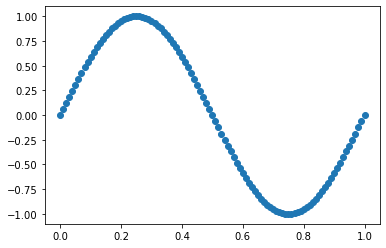

In [48]:
X_base = np.linspace(0.00 , 1.00, num = 101).reshape(-1,1)
Y_base = np.sin(2 * np.pi * X_base)
plt.plot(X_base, Y_base ,'o')

In [67]:
#OVERFITTING AND UNDERFITTING
np.random.seed(0)

poly_degree = 3
samples = 20

x = np.random.rand(samples,1)
y = np.sin(2 * np.pi * x) + 0.2 * np.random.randn(samples,1) #adding gaussian noise

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.5) 

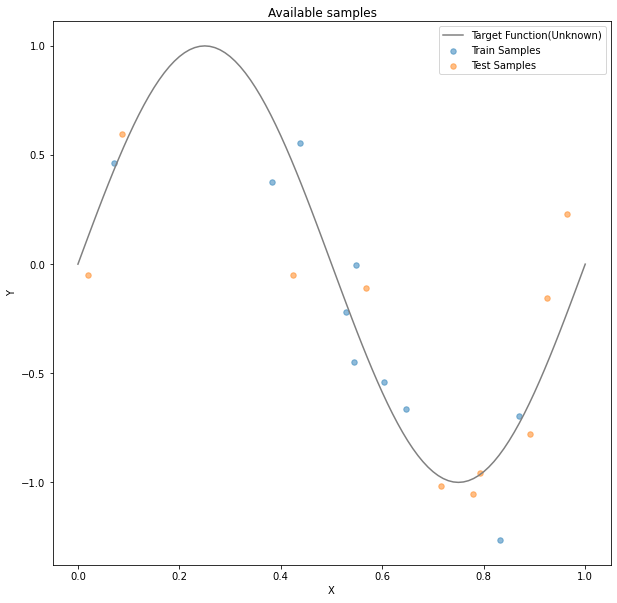

In [69]:
plt.figure(figsize = (10,10))

plt.suptitle("Available samples", y=0.9)
plt.scatter(X_train, Y_train ,marker = 'o',s = 30,label = 'Train Samples',alpha=0.5)
plt.scatter(X_test, Y_test ,marker = 'o',s = 30,label = 'Test Samples', alpha=0.5)
plt.plot(X_base, Y_base ,'-', color = 'gray', label = 'Target Function(Unknown)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

In [70]:
pf = PolynomialFeatures(degree = poly_degree)
pf = pf.fit(X_train)

X_train_poly = pf.transform(X_train)
X_test_poly = pf.transform(X_test)
X_base_poly = pf.transform(X_base)

In [71]:
#linear regressor
regressor = LinearRegression()
regressor = regressor.fit(X_train_poly, Y_train)

#predictions
Y_pred_train = regressor.predict(X_train_poly)
Y_pred_test = regressor.predict(X_test_poly)
Y_pred_base = regressor.predict(X_base_poly)

#train
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = math.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_pred_train)

#test
mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = math.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_pred_test)

<function matplotlib.pyplot.show(*args, **kw)>

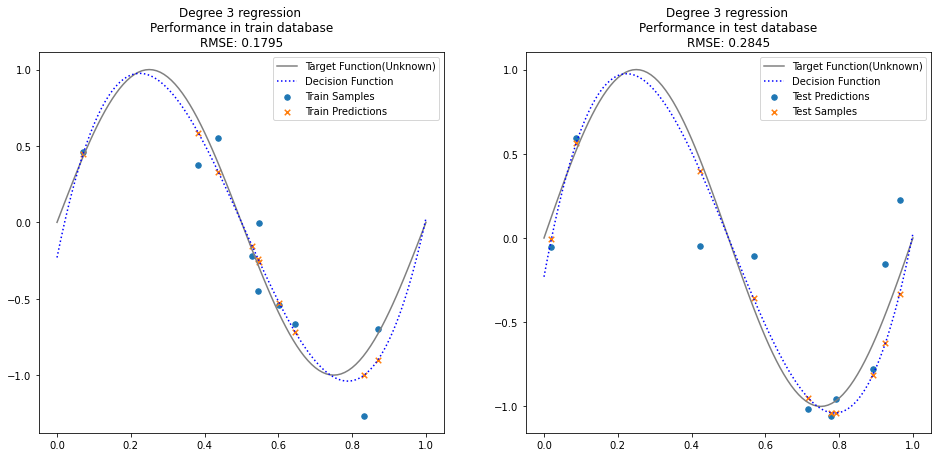

In [72]:
plt.figure(figsize = (16,7))

plot1 = plt.subplot(121)
plot2 = plt.subplot(122)

plot1.title.set_text(
    ('Degree %d regression \n'%poly_degree) + 
    'Performance in train database\n' +
    ('RMSE: %.4f' %rmse_train)
    )
plot1.plot(X_base, Y_base ,'-', color = 'gray', label = 'Target Function(Unknown)')
plot1.scatter(X_train, Y_train ,marker = 'o',s = 30,label = 'Train Samples')
plot1.scatter(X_train, Y_pred_train ,marker = 'x',s = 30,label = 'Train Predictions')
plot1.plot(X_base, Y_pred_base ,linestyle = 'dotted',color = 'blue', label = 'Decision Function')

plot2.title.set_text(
    ('Degree %d regression \n'%poly_degree) + 
    'Performance in test database\n' +
    ('RMSE: %.4f' %rmse_test)
    )
plot2.plot(X_base, Y_base ,'-', color = 'gray', label = 'Target Function(Unknown)')
plot2.scatter(X_test, Y_test ,marker = 'o',s = 30,label = 'Test Predictions')
plot2.scatter(X_test, Y_pred_test ,marker = 'x',s = 30,label = 'Test Samples')
plot2.plot(X_base, Y_pred_base ,linestyle = 'dotted',color = 'blue', label = 'Decision Function')

plot1.legend()
plot2.legend()
plt.show